# Datasets

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import config
import utils

## Trainings corpus

### Pubmed Central Open Access Dataset
- File size: 45 GB
- Number of articles: > 1.7 mio
- Number of words: 8,126,457,106
- Number of sentences: 277,809,416
- Average line length (number of characters): 162
- Longest line length (number of characters): 111,562


## Biosses dataset

Paper: https://www.ncbi.nlm.nih.gov/pubmed/28881973 

* Benchmark dataset of biomedical sentence similarity estimation
* 100 sentence pairs evaluated by five different human experts who judged their similarity and assigned scores ranging from 0 (no relation) to 4 (equivalent)


### Example sentences

| Sentence 1                                                                                                                         | Sentence 2                                                                                        | Comment                                                      | Score |
|------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|--------------------------------------------------------------|-------|
| This article discusses the current data on using anti-HER2 therapies to treat CNS metastasis as well as the newer anti-HER2 agents | Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis. | The two sentences are not equivalent, but share some details | 2     |
|                                                                                                                                    |                                                                                                   |                                                              |       |


### Rating scale

| Score | Meaning                                                                                        |
|-------|------------------------------------------------------------------------------------------------|
| 0     | The two sentences are on different topics.                                                     |
| 1     | The two sentences are not equivalent, but are on the same topic.                               |
| 2     | The two sentences are not equivalent, but share some details.                                  |
| 3     | The two sentences are roughly equivalent, but some important information differs / is missing. |
| 4     | The two sentences are completely or mostly equivalent, as they mean the same thing.            |

### All sentence pairs + ratings

In [4]:
sentence_pair_ratings_df = pd.read_csv(config.SENTENCE_COSINE_SIMILARITIES)

In [5]:
sentence_pair_ratings_df = sentence_pair_ratings_df.iloc[:, 1:4]

In [34]:
sentence_pair_ratings_df

,Sentence 1,Sentence 2,Annotation scores
0,It has recently been shown that Craf is essent...,It has recently become evident that Craf is es...,4.0
1,The Bcl-2 inhibitor ABT-737 induces regression...,"Recently, it has been reported that ABT-737 is...",3.0
2,Previous studies demonstrated that the decreas...,"In addition, genetic and functional studies su...",2.2
3,"More recently, IDH mutations and resultant 2-h...",It has also been recently reported that mutati...,3.2
4,Recent in vitro studies using shRNA-based appr...,Two recent studies used RNAi-mediated Tet2 kno...,3.2
5,"Recently, it was reported that expression of I...",This large-scale study showed that IDH1/IDH2 m...,3.2
6,"Recently, it was reported that expression of I...",The mechanism was clarified by yet another gen...,1.4
7,expression of an activated form of Ras protein...,"When expressed alone in primary cells however,...",3.0
8,A high percentage of tumor cells that take on ...,"As a serine/threonine protein kinase, AKT func...",1.4
9,In view of the evidence that many tumors occur...,The phenomena of neoplastic development and ne...,3.0


### Distribution of annotation scores

In [6]:
# Read scores assigned by human experts for the 100 sentence pairs into np.array
with open(config.ANNOTATION_SCORES, "r", encoding="utf-8") as scores:
    annotation_scores = np.loadtxt(scores)

In [7]:
annotation_scores

array([4. , 3. , 2.2, 3.2, 3.2, 3.2, 1.4, 3. , 1.4, 3. , 3. , 1. , 3. ,
       2. , 2.4, 3.4, 3. , 2. , 3.2, 2. , 3. , 1.2, 3.4, 1.8, 3.6, 2. ,
       2.4, 3.4, 3. , 4. , 4. , 3.4, 3.4, 3. , 2. , 3.8, 3.4, 2. , 4. ,
       3.2, 2.2, 3. , 2. , 0.6, 3.2, 3.6, 1. , 1.8, 2.8, 2.8, 1.8, 1.8,
       2.6, 1.4, 3. , 0.6, 1.8, 3. , 3. , 3.8, 2.4, 3.6, 2.8, 3.6, 3. ,
       0. , 0. , 0.2, 0. , 0.2, 0.2, 1.8, 1.4, 1.8, 2. , 0. , 0.8, 2.2,
       1.4, 1.8, 3. , 1.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0. , 0.2, 0.2, 2. ,
       2.8, 2. , 4. , 3. , 3.2, 1.6, 2.4, 3.2, 1.8])

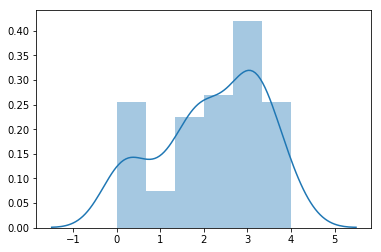

In [8]:
sns.distplot(annotation_scores)